# Install Package

In [1]:
!pip install PyPDF2
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PyPDF2
from google.colab import files
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer



# Step 1: Upload Files

In [ ]:
uploaded = files.upload()

valid_skills = {
    "python", "java", "c++", "c#", "r", "kotlin", "javascript", "php", "html", "css", "ruby",
    "tensorflow", "keras", "scikit-learn", "pandas", "numpy", "matplotlib", "seaborn", "django", "flask", "spring",
    "sql", "mysql", "postgresql", "microsoft sql", "nosql", "mongodb", "apache spark", "hadoop", "power bi", "tableau", "excel",
    "google cloud platform", "aws", "machine learning", "deep learning", "neural networks", "natural language processing",
    "nlp", "computer vision", "random forest", "decision trees", "regression", "classification", "clustering",
    "big data", "google bigquery", "kubernetes", "docker", "heroku", "azure", "time series analysis", "anova", "statistics",
    "data mining", "data analysis", "raspberry pi", "automation", "git", "github", "jira", "restapi", "selenium",
    "ci/cd pipelines", "jenkins", "tableau","apache kafka", "apache flink", "airflow", "luigi", "etl",
    "google kubernetes engine", "amazon elastic kubernetes service", "microsoft azure functions",
    "terraform", "ansible", "chef", "puppet", "vagrant",
    "plotly", "d3.js", "power bi", "qlikview",
    "bitbucket", "gitlab",
    "amazon s3", "google cloud storage", "azure blob storage",
    "apache hadoop", "apache cassandra", "apache hive", "apache pig",
    "swift", "rust", "go",
    "node.js", "express.js", "vue.js", "angular",
    "reinforcement learning", "generative adversarial networks", "gan", "bayesian networks",
    "mqtt", "zigbee", "lorawan", "ble", "bluetooth low energy",
    "ethereum", "hyperledger", "smart contracts", "solidity",
    "ethical hacking", "penetration testing", "siem", "firewalls", "vpn",
    "flutter", "react native", "swift", "android sdk",
    "sap businessobjects", "microstrategy", "sas business analytics",
    "unity", "unreal engine", "cocos2d",
    "opencv", "yolo", "mask r-cnn", "image segmentation"
}

Saving candidate_000.pdf to candidate_000.pdf
Saving candidate_001.pdf to candidate_001.pdf
Saving candidate_002.pdf to candidate_002.pdf
Saving candidate_003.pdf to candidate_003.pdf
Saving candidate_004.pdf to candidate_004.pdf
Saving candidate_005.pdf to candidate_005.pdf
Saving candidate_006.pdf to candidate_006.pdf
Saving candidate_007.pdf to candidate_007.pdf
Saving candidate_008.pdf to candidate_008.pdf
Saving candidate_009.pdf to candidate_009.pdf
Saving candidate_010.pdf to candidate_010.pdf
Saving candidate_011.pdf to candidate_011.pdf
Saving candidate_012.pdf to candidate_012.pdf
Saving candidate_013.pdf to candidate_013.pdf
Saving candidate_014.pdf to candidate_014.pdf
Saving candidate_015.pdf to candidate_015.pdf
Saving candidate_016.pdf to candidate_016.pdf
Saving candidate_017.pdf to candidate_017.pdf
Saving candidate_018.pdf to candidate_018.pdf
Saving candidate_019.pdf to candidate_019.pdf
Saving candidate_020.pdf to candidate_020.pdf
Saving candidate_021.pdf to candid

# Step 2: Extract Text from PDF

In [ ]:
def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text()
        return text
    except:
        return ""  # Return empty string if any error occurs

# Step 3: Extract Skills from PDF

In [ ]:
def extract_skills_from_text(text, keyword_list):
    words = text.lower().split()  # Tokenize text by spaces and convert to lowercase
    found_skills = [word for word in words if word in keyword_list]
    return list(set(found_skills))  # Return unique skills

# Step 4: Process Uploaded CVs and Add New Skills to valid_skills

In [ ]:
cv_data = []
updated = True  # Flag to check if any update in skills happened

while updated:  # Continue looping if any new skills were added
    updated = False  # Reset the flag for this loop
    for filename in uploaded:
        if filename.endswith(".pdf"):
            cv_text = extract_text_from_pdf(filename)  # Extract text from the PDF file
            if cv_text:
                skills = extract_skills_from_text(cv_text, valid_skills)  # Extract skills from the text
                cv_data.append({"filename": filename, "skills": skills})

                # Add any new skills found in the CV to valid_skills
                new_skills = [skill for skill in skills if skill not in valid_skills]
                if new_skills:  # If there are new skills
                    valid_skills.update(new_skills)  # Add new skills to valid_skills
                    updated = True  # Set the flag to True if new skills were added
                    break  # Exit the loop to re-process all CVs again

# Convert CV data to DataFrame
df_cv = pd.DataFrame(cv_data)

# Display DataFrame with extracted skills
print(df_cv)

# Display updated valid_skills
print("\nUpdated valid skills:", valid_skills)

              filename                                    skills
0    candidate_000.pdf        [classification, r, pandas, excel]
1    candidate_001.pdf                             [nlp, hadoop]
2    candidate_002.pdf                           [python, flask]
3    candidate_003.pdf                                    [mqtt]
4    candidate_004.pdf                                        []
..                 ...                                       ...
145  candidate_145.pdf                                        []
146  candidate_146.pdf                       [classification, r]
147  candidate_147.pdf                       [classification, r]
148  candidate_148.pdf  [classification, regression, clustering]
149  candidate_149.pdf                              [tensorflow]

[150 rows x 2 columns]

Updated valid skills: {'airflow', 'django', 'nlp', 'amazon elastic kubernetes service', 'unreal engine', 'mongodb', 'docker', 'etl', 'rust', 'puppet', 'azure blob storage', 'microsoft sql', 'apac

# Step 5: Process Job List

In [ ]:
# Load job list
df_jobs = pd.read_csv('job_list.csv')

# Keywords for job titles and corresponding skills
job_keywords = {
    "data": ["python", "sql", "data analysis", "statistics", "excel", "power bi", "tableau"],
    "analyst": ["sql", "python", "data visualization", "business analysis", "statistics"],
    "engineering": ["python", "sql", "java", "c++", "cloud computing", "docker", "kubernetes"],
    "manager": ["project management", "excel", "jira", "leadership", "communication"],
    "designer": ["photoshop", "illustrator", "ui/ux", "adobe xd", "figma"],
    "electrical": ["circuit design", "matlab", "simulink", "power systems"],
    "illustrator": ["illustrator", "photoshop", "adobe suite"],
    "application": ["application development", "java", "android", "ios", "flutter"],
    "developer": ["java", "javascript", "python", "html", "css", "react", "node.js"],
    "business": ["business analysis", "strategy", "excel", "data analysis", "communication"]
}

# Function to generate skills_needed based on job_title
def generate_skills_needed(job_title):
    skills_needed = []
    for keyword, skills in job_keywords.items():
        if keyword in job_title.lower():
            skills_needed.extend(skills)
    return list(set(skills_needed))

df_jobs["skills_needed"] = df_jobs["job_title"].apply(generate_skills_needed)

In [ ]:
# Function to generate skills_needed based on job_title
def generate_skills_needed(job_title):
    skills_needed = []
    for keyword, skills in job_keywords.items():
        if keyword in job_title.lower():
            skills_needed.extend(skills)
    return list(set(skills_needed))

df_jobs["skills_needed"] = df_jobs["job_title"].apply(generate_skills_needed)

In [ ]:
df_jobs.to_csv("jobs.csv", index=False) # index=False mencegah indeks DataFrame disimpan

# Step 6: Pre-Process for TensorFlow Model

In [ ]:
df_jobs_reduced = df_jobs.sample(n=len(df_cv), random_state=42)

In [ ]:
df_cv['skills_str'] = df_cv['skills'].apply(lambda x: ','.join(x))
df_jobs_reduced['skills_needed_str'] = df_jobs_reduced['skills_needed'].apply(lambda x: ','.join(x))

In [ ]:
df_cv['skills_str'] = df_cv['skills_str'].str.lower()
df_jobs_reduced['skills_needed_str'] = df_jobs_reduced['skills_needed_str'].str.lower()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_cv = vectorizer.fit_transform(df_cv['skills_str'])
X_jobs = vectorizer.transform(df_jobs_reduced['skills_needed_str'])

In [ ]:
X_cv_array = X_cv.toarray()
X_jobs_array = X_jobs.toarray()

# Step 7: Build and Train the Model

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Hitung Cosine Similarity sebagai label (untuk evaluasi dan perbandingan)
y_cosine = []
for i in range(len(df_cv)):
    similarities = cosine_similarity(X_cv_array[i].reshape(1, -1), X_jobs_array).flatten()
    y_cosine.append(np.max(similarities))
y_cosine = np.array(y_cosine)

# Bagi data (pastikan membagi pasangan kandidat-pekerjaan)
X_train_cv, X_test_cv, X_train_jobs, X_test_jobs, y_train, y_test = train_test_split(
    X_cv_array, X_jobs_array, y_cosine, test_size=0.2, random_state=42
)

# Gabungkan X_cv dan X_jobs untuk model regresi
X_train = np.concatenate((X_train_cv, X_train_jobs), axis=1)
X_test = np.concatenate((X_test_cv, X_test_jobs), axis=1)


# Model Regresi
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
dense_layer = tf.keras.layers.Dense(128, activation='relu')(input_layer)
output_layer = tf.keras.layers.Dense(1, activation='linear')(dense_layer) # Linear activation for regression
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse', metrics=['mae']) # MSE loss for regression
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))




Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.1773 - mae: 0.3034 - val_loss: 0.1213 - val_mae: 0.2509
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1295 - mae: 0.2395 - val_loss: 0.0827 - val_mae: 0.2139
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1107 - mae: 0.2318 - val_loss: 0.0628 - val_mae: 0.1994
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0766 - mae: 0.2098 - val_loss: 0.0551 - val_mae: 0.1962
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0769 - mae: 0.2198 - val_loss: 0.0518 - val_mae: 0.1953
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0644 - mae: 0.2037 - val_loss: 0.0475 - val_mae: 0.1886
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0605 - mae: 0.1976 - val_loss: 0.0421 - val_mae: 0.1782
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0462 - mae: 0.1751 - val_loss: 0.0363 - val_mae: 0.1648
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0506 - mae:

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           7,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,277 (87.02 KB)

 Trainable params: 7,425 (29.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,852 (58.02 KB)

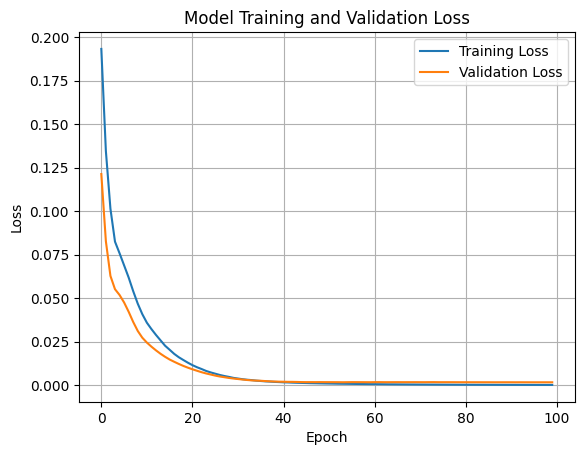

In [ ]:
# Plot grafik loss validasi dan training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend() # Menambahkan legenda
plt.grid(True) # Menambahkan grid untuk memudahkan pembacaan
plt.show()

# Step 8: Generate Job Recommendations Using Cosine Similarity

In [ ]:
def recommend_jobs(cv_skills, df_jobs, model, vectorizer):
    """Merekomendasikan 3 pekerjaan berdasarkan skor matching tertinggi."""
    cv_vector = vectorizer.transform([cv_skills]).toarray()
    all_job_vectors = vectorizer.transform(df_jobs['skills_needed_str']).toarray()

    combined_vectors = np.zeros((len(df_jobs), cv_vector.shape[1] + all_job_vectors.shape[1]))
    for i in range(len(df_jobs)):
        combined_vectors[i] = np.concatenate((cv_vector[0], all_job_vectors[i]))

    scores = model.predict(combined_vectors)
    sorted_indices = np.argsort(scores.flatten())[::-1]

    # Ambil hanya 3 indeks teratas
    top_3_indices = sorted_indices[:3]

    # Ambil tautan pekerjaan dari 3 indeks teratas
    recommended_job_links = df_jobs.iloc[top_3_indices]['job_link'].tolist()
    return recommended_job_links

# Step 9: Display Results

In [ ]:
# Contoh penggunaan:
new_cv_skills = "Python, Machine Learning, Data Science"  # Contoh keahlian kandidat baru
recommended_links = recommend_jobs(new_cv_skills, df_jobs_reduced, model, vectorizer)
print(f"Rekomendasi pekerjaan: {recommended_links}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Rekomendasi pekerjaan: ['https://www.indeed.com/rc/clk?jk=2f5a374e6475356f&bb=GiJwsIqGJWMRegm6yoImPxWnTe_gPr60OlhYcItKCaUX5NhOQrEOibZVwkFE9BKl1jt2TYNFh8UdNz6hOJ5-uWYQQr8bw4GsmIlhkklzjV3Nt2GSPuhgr2KrsIVv64zD&xkcb=SoBn67M34FryiFwGbZ0DbzkdCdPP&fccid=ca7f6aef7b613740&vjs=3', 'https://www.indeed.com/rc/clk?jk=a2d61699a85387ea&bb=BYfgd_tj6A_zvSf57WKpoc5ZeVV23bAr90AT33oEEHkAM2QonXOxV_EYG4muQc15-QRP7UWjZbDFXT1o7pPqFo_Rw6iAjCW89hN-j1iSm8RybeQ7eS4ykYf4tFDafrUi&xkcb=SoDI67M34FryH5ADNL0CbzkdCdPP&fccid=02ab41a8726385cd&vjs=3', 'https://www.indeed.com/rc/clk?jk=d5a2eb5c712081ed&bb=sZSXyKBmELwZi_xUC8ktG1mKgQ3FANNUe3cBTZgYrK46kYkHxBpCxq3iM-eJEBNmDWo1bIb8MLWljqSwKKRyEXqEHznzWmRPRr-j9zCrsCn9FT-edSMc3s5JT7E0hoMo&xkcb=SoAd67M34FrzOsRS3Z0FbzkdCdPP&fccid=f287b6189e174df5&vjs=3']


# **BUILD REQUIREMENT.TXT**

In [3]:
!pip freeze


absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1

In [4]:

with open('requirements.txt', 'w') as f:
    f.write("pandas==1.5.3\n")
    f.write("matplotlib==3.7.2\n")
    f.write("numpy==1.23.5\n")
    f.write("tensorflow==2.13.0\n")
    f.write("PyPDF2==3.0.1\n")
    f.write("google-colab==1.0.0\n")
    f.write("scikit-learn==1.2.2\n")
    f.write("transformers==4.33.2\n")


from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>